In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install shap

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 37.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 43.1 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [shap]7/8 [shap]]te]
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --force-reinstall numpy==2.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 17.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score

import shap

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.autolayout'] = True

print("Libraries imported successfully")


Libraries imported successfully


/Users/wilco/DAE Projects/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.read_csv('hypertension_dataset.csv')
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [8]:
df.describe

<bound method NDFrame.describe of       Age  Salt_Intake  Stress_Score       BP_History  Sleep_Duration   BMI  \
0      69          8.0             9           Normal             6.4  25.8   
1      32         11.7            10           Normal             5.4  23.4   
2      78          9.5             3           Normal             7.1  18.7   
3      38         10.0            10     Hypertension             4.2  22.1   
4      41          9.8             1  Prehypertension             5.8  16.2   
...   ...          ...           ...              ...             ...   ...   
1980   56         10.2             0           Normal             6.5  25.0   
1981   29          8.9             4     Hypertension             6.9  16.9   
1982   64          5.9             9           Normal             5.6  18.9   
1983   35          7.4             8  Prehypertension             8.2  29.2   
1984   38          7.3             0           Normal             8.3  18.6   

         Medicati

In [10]:
target_col = 'Has_Hypertension'

plt.figure(figsize=(8,6))
sns.countplot(x=target_col,palette='viridis')
plt.title('Distribution of the Target Variable (Hypertension Risk)',fontsize = 16)
plt.xlabel('Hypertension Risk (No / Yes)',fontsize = 12)
plt.ylabel('Patient Count',fontsize = 12)
plt.show()

TypeError: 'module' object is not callable

In [14]:
import matplotlib.pyplot as plt

/var/folders/vl/z6gfc_1s4mbd9k5knjb6qm1c0000gn/T/ipykernel_12832/4043568696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_col, palette='viridis')


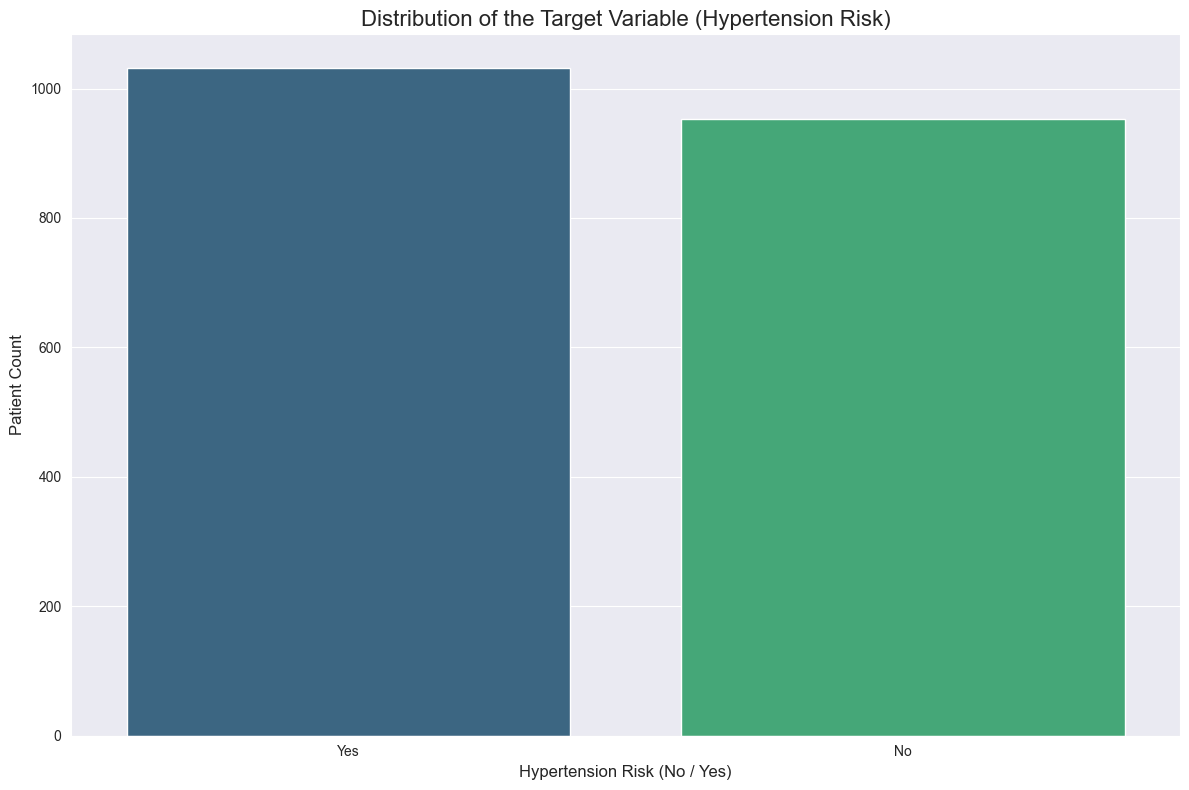

In [15]:
target_col = 'Has_Hypertension'

plt.figsize=(8,6)
sns.countplot(data=df, x=target_col, palette='viridis')
plt.title('Distribution of the Target Variable (Hypertension Risk)', fontsize=16)
plt.xlabel('Hypertension Risk (No / Yes)', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)
plt.show()